### 1. 데이터셋 불러오기

In [53]:
#필요한 것 들
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [243]:
#데이터셋 불러오고 확인해보기
df_test = pd.read_csv('./data/samsung.csv')
df_test.head()
print(df_test.iloc[0,0])
df_test = df_test.iloc[:,1:]
df_test.head()

2022-11-22


,close,start,high,low,volume,transactionPrice,capitalization
0,60600,60900,61200,60300,9411289,5.714610e+11,3.617690e+14
1,61400,61400,61800,60800,9378097,5.737830e+11,3.665450e+14
2,61800,61800,62400,61400,12236503,7.574550e+11,3.689330e+14
3,61400,62000,62000,61300,13298296,8.191190e+11,3.665450e+14
4,62700,62400,62700,61700,12909260,8.042200e+11,3.743050e+14


### 2. 데이터 정규화 하기 by MinMaxScaler

In [244]:
#데이터 정규화
scaler_ = MinMaxScaler()
scaler_.fit(df_test)
scaled_ = scaler_.transform(df_test)

df = pd.DataFrame(scaled_)

#inverse_minmaxscaler를 위함
scaler = MinMaxScaler()
scaler.fit(df_test['close'].values.reshape(-1,1))

print(df)
print(f"최소\n{df.min()}")
print(f"최대\n{df.max()}")

            0         1         2         3         4         5         6
0    0.286738  0.303887  0.279412  0.299296  0.113235  0.100030  0.286738
1    0.315412  0.321555  0.301471  0.316901  0.112203  0.101046  0.315413
2    0.329749  0.335689  0.323529  0.338028  0.201041  0.181389  0.329751
3    0.315412  0.342756  0.308824  0.334507  0.234042  0.208362  0.315413
4    0.362007  0.356890  0.334559  0.348592  0.221950  0.201845  0.362004
..        ...       ...       ...       ...       ...       ...       ...
243  0.706093  0.749117  0.753676  0.711268  0.224840  0.263153  0.706093
244  0.756272  0.805654  0.790441  0.767606  0.211073  0.256676  0.756274
245  0.795699  0.837456  0.830882  0.785211  0.307203  0.363683  0.795702
246  0.813620  0.837456  0.823529  0.799296  0.505394  0.574749  0.813624
247  0.799283  0.742049  0.794118  0.746479  0.675631  0.745568  0.799287

[248 rows x 7 columns]
최소
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
dtype: float64
최대
0   

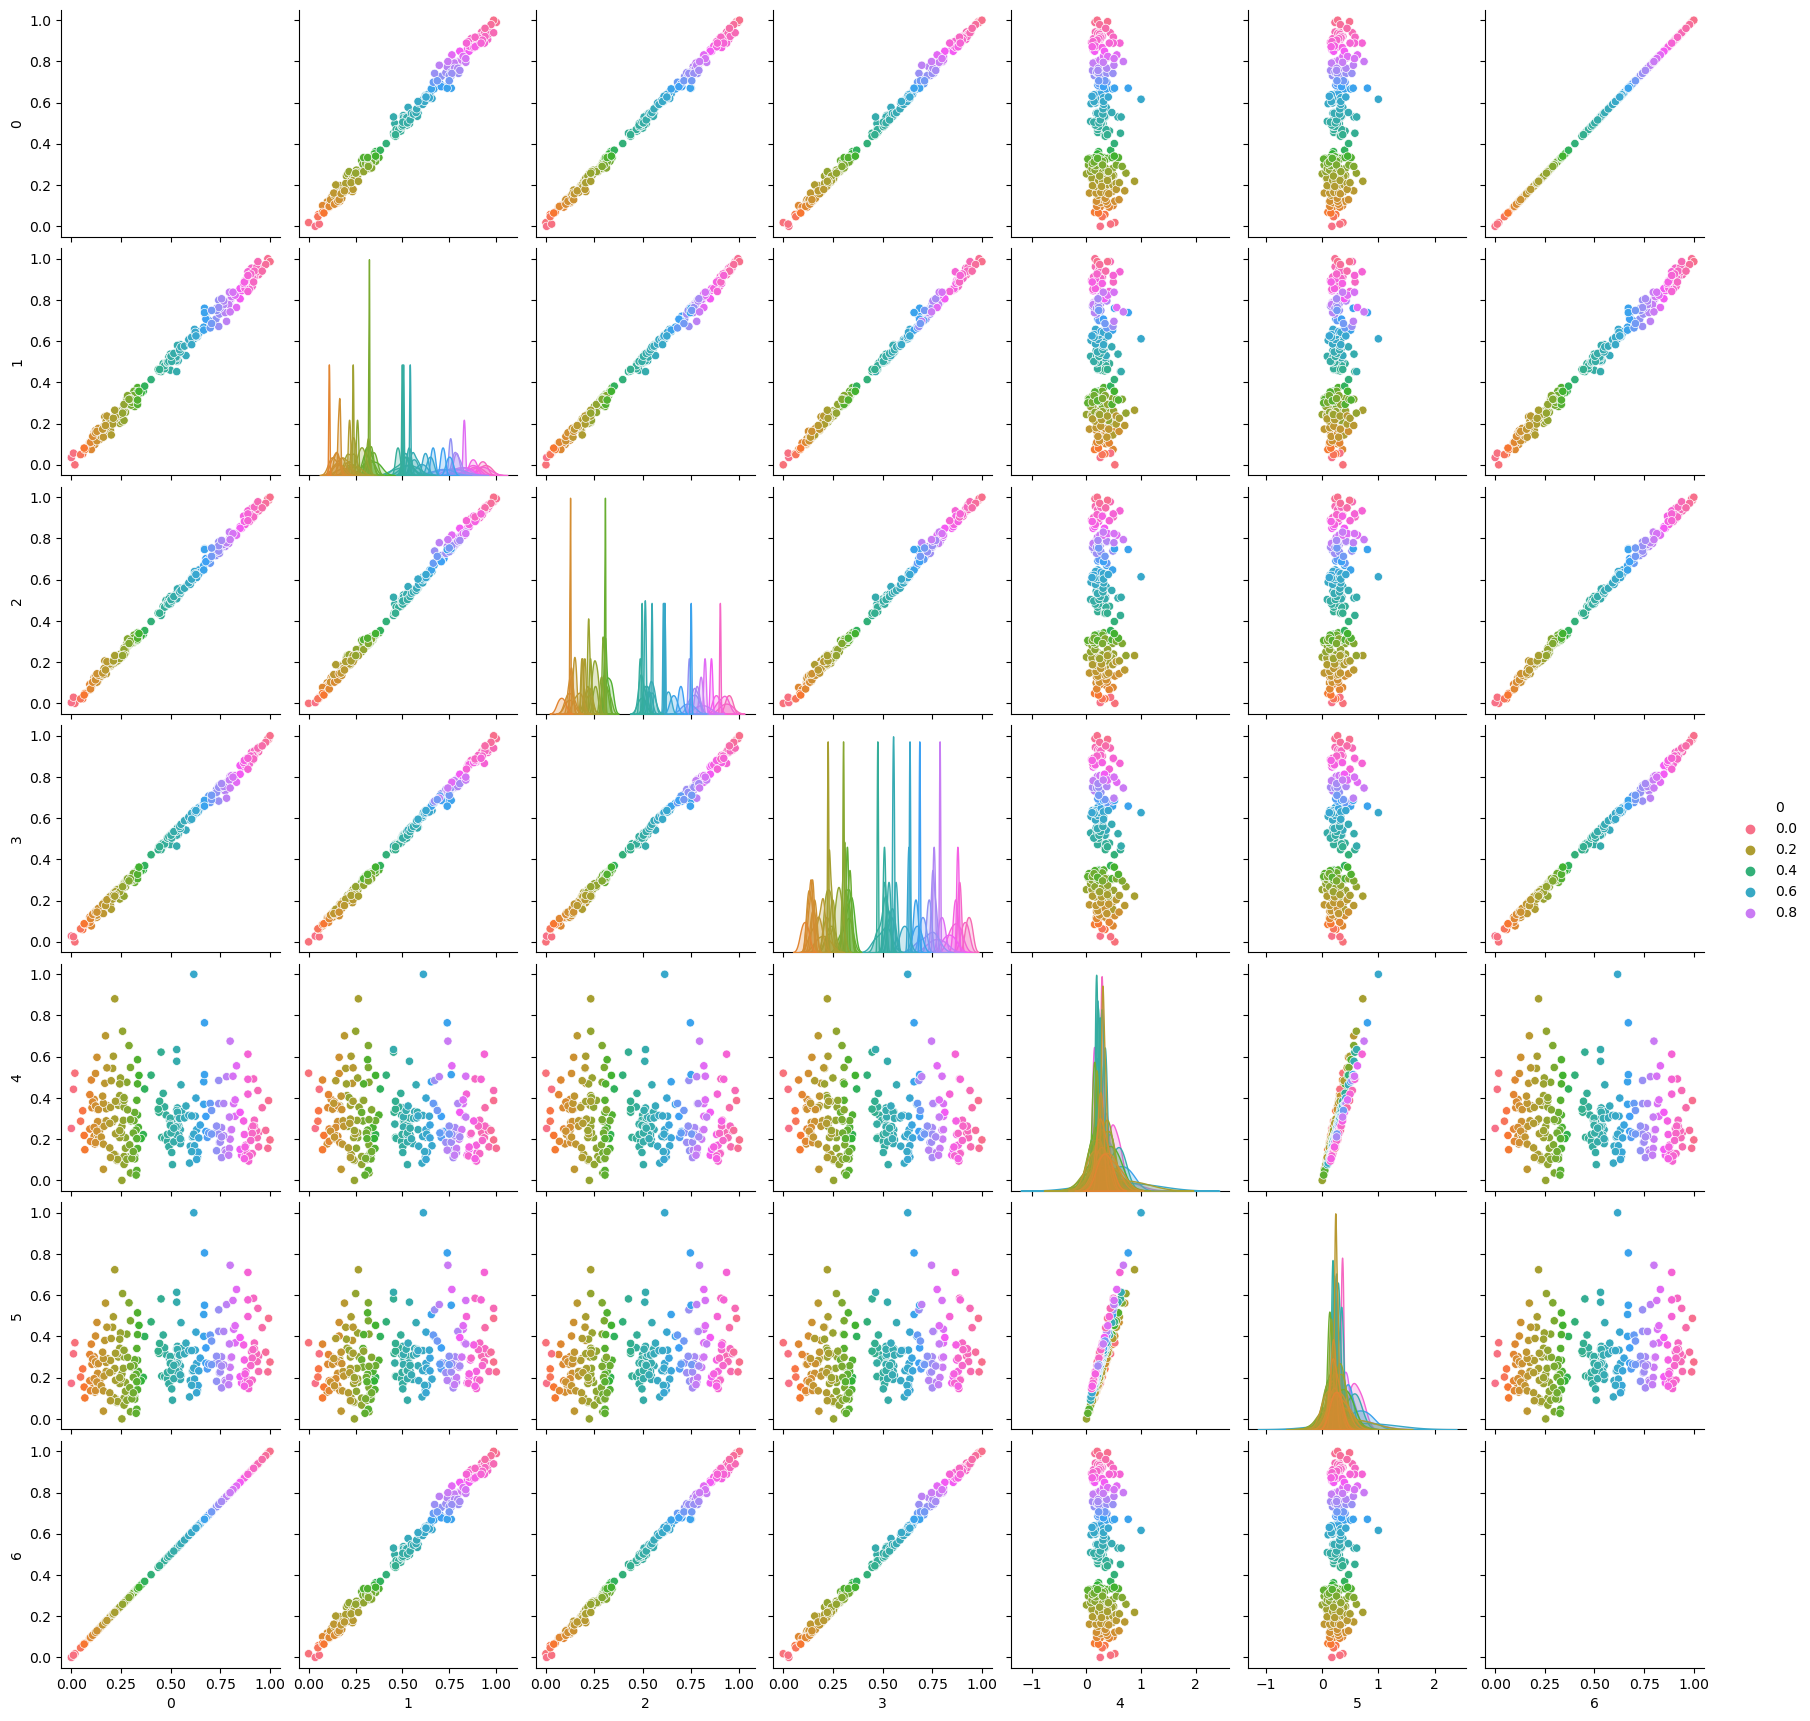

In [245]:
#데이터셋 분석해보기(상관관계 분석)

cols = [0,1,2,3,4,5,6]
sns.pairplot(data = df, vars = cols, hue = 0, palette = 'husl')
plt.show()

### 3. 학습 및 테스트 데이터와 모델 만들기

In [172]:
#학습 데이터 쪼개기

X = df.iloc[:, 1:7]
y = df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True) #여기서 20% 나눠주고

In [173]:
print(X_train)

            1         2         3         4         5         6
4    0.356890  0.334559  0.348592  0.221950  0.201845  0.362004
80   0.300353  0.305147  0.316901  0.025775  0.027352  0.326167
46   0.166078  0.128676  0.147887  0.183274  0.137728  0.121863
34   0.106007  0.066176  0.095070  0.415862  0.312351  0.093188
83   0.310954  0.305147  0.313380  0.202747  0.180251  0.329751
..        ...       ...       ...       ...       ...       ...
40   0.074205  0.047794  0.084507  0.148811  0.101799  0.068097
188  0.802120  0.808824  0.799296  0.243586  0.297098  0.802871
133  0.480565  0.466912  0.475352  0.356412  0.345254  0.469536
118  0.537102  0.511029  0.524648  0.577990  0.566460  0.530464
55   0.208481  0.231618  0.225352  0.262175  0.218073  0.254479

[198 rows x 6 columns]


In [192]:
#모델 만들기

model = Sequential()
model.add(Dense(10, input_dim = 6, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 10)                70        
                                                                 
 dense_64 (Dense)            (None, 30)                330       
                                                                 
 dense_65 (Dense)            (None, 20)                620       
                                                                 
 dense_66 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,041
Trainable params: 1,041
Non-trainable params: 0
_________________________________________________________________


### 4. 학습 및 결과 시각화

Epoch 1/1000
50/50 [==============================] - 0s 9ms/step - loss: 3.8606e-06 - accuracy: 0.0135 - val_loss: 4.8569e-05 - val_accuracy: 0.0000e+00
Epoch 2/1000
50/50 [==============================] - 0s 5ms/step - loss: 1.7372e-05 - accuracy: 0.0135 - val_loss: 5.9427e-05 - val_accuracy: 0.0000e+00
Epoch 3/1000
50/50 [==============================] - 0s 5ms/step - loss: 4.2973e-05 - accuracy: 0.0135 - val_loss: 4.7040e-05 - val_accuracy: 0.0000e+00
Epoch 4/1000
50/50 [==============================] - 0s 4ms/step - loss: 9.0719e-06 - accuracy: 0.0135 - val_loss: 4.2361e-05 - val_accuracy: 0.0000e+00
Epoch 5/1000
50/50 [==============================] - 0s 3ms/step - loss: 6.9827e-06 - accuracy: 0.0135 - val_loss: 5.3957e-05 - val_accuracy: 0.0000e+00
Epoch 6/1000
50/50 [==============================] - 0s 4ms/step - loss: 5.1159e-06 - accuracy: 0.0135 - val_loss: 4.1186e-05 - val_accuracy: 0.0000e+00
Epoch 7/1000
50/50 [==============================] - 0s 3ms/step - loss: 1.

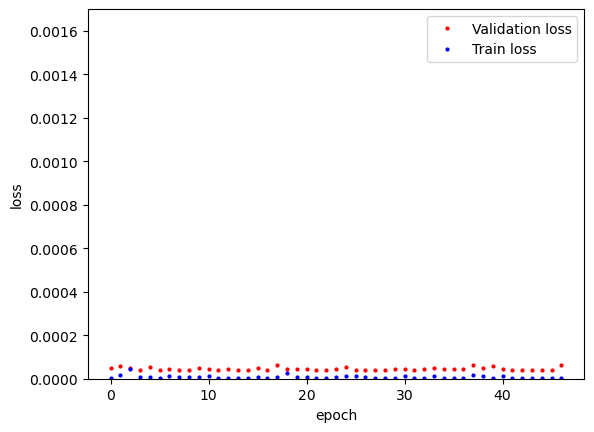

In [231]:
#학습 및 가장 잘 학습된 모델 저장

modelpath = './data/stock_model/stock_best_model.hdf5'

checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 0,#화면 출력을 간결하게게
                               save_best_only = True) #save best model

early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 20)
history = model.fit(X_train, y_train, epochs = 1000, batch_size = 3, validation_split = 0.25, verbose = 1, callbacks = [early_stopping_callback, checkpointer])

#8000 epochs 까지 돌려본 결과 에폭수에 상관 없이 학습이 아주 잘된다. 레이블과 데이터의 연관성이 아주 높아서 그런것 같다.
#아마 input 데이터를 사람한테 줘도 잘 맞출 것 같다. 상관성이 아주 높기때문에 적은양의 에폭으로 학습이 가능 한 것 같다.

score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
hist_df = pd.DataFrame(history.history)
#print(hist_df)

y_val_loss = hist_df['val_loss']
y_train_loss = hist_df['loss']

x_len = np.arange(len(y_train_loss))
plt.plot(x_len, y_val_loss, 'o', c = 'red', markersize = 2, label = 'Validation loss')
plt.plot(x_len, y_train_loss, 'o', c = 'blue', markersize = 2, label = 'Train loss')

plt.legend(loc = 'upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim([0, 0.0017])
plt.show()

In [232]:
hist_df = pd.DataFrame(history.history)
print(hist_df) #심심해서 출력해보는 히스토리

        loss  accuracy  val_loss  val_accuracy
0   0.000004  0.013514  0.000049           0.0
1   0.000017  0.013514  0.000059           0.0
2   0.000043  0.013514  0.000047           0.0
3   0.000009  0.013514  0.000042           0.0
4   0.000007  0.013514  0.000054           0.0
5   0.000005  0.013514  0.000041           0.0
6   0.000014  0.013514  0.000044           0.0
7   0.000006  0.013514  0.000040           0.0
8   0.000007  0.013514  0.000041           0.0
9   0.000007  0.013514  0.000052           0.0
10  0.000011  0.013514  0.000044           0.0
11  0.000004  0.013514  0.000040           0.0
12  0.000004  0.013514  0.000047           0.0
13  0.000004  0.013514  0.000040           0.0
14  0.000003  0.013514  0.000039           0.0
15  0.000006  0.013514  0.000051           0.0
16  0.000005  0.013514  0.000041           0.0
17  0.000010  0.013514  0.000063           0.0
18  0.000026  0.013514  0.000043           0.0
19  0.000006  0.013514  0.000047           0.0
20  0.000009 

2/2 [==============================] - 0s 2ms/step
Real price: 0.5304659498207884, Expected price: 0.5343632102012634
Real price: 0.010752688172043001, Expected price: 1.201784016302554e-05
Real price: 0.7956989247311828, Expected price: 0.8020492196083069
Real price: 0.4551971326164874, Expected price: 0.45755788683891296
Real price: 0.6200716845878136, Expected price: 0.6250583529472351
Real price: 0.18279569892473124, Expected price: 0.18615561723709106
Real price: 0.8315412186379929, Expected price: 0.8331177234649658
Real price: 0.3189964157706091, Expected price: 0.3199945390224457
Real price: 0.7921146953405016, Expected price: 0.798060417175293
Real price: 0.3405017921146951, Expected price: 0.3426761031150818
Real price: 0.2186379928315414, Expected price: 0.22049233317375183
Real price: 0.17562724014336895, Expected price: 0.17857769131660461
Real price: 0.7992831541218639, Expected price: 0.8049982190132141
Real price: 0.6774193548387097, Expected price: 0.6827760934829712
R

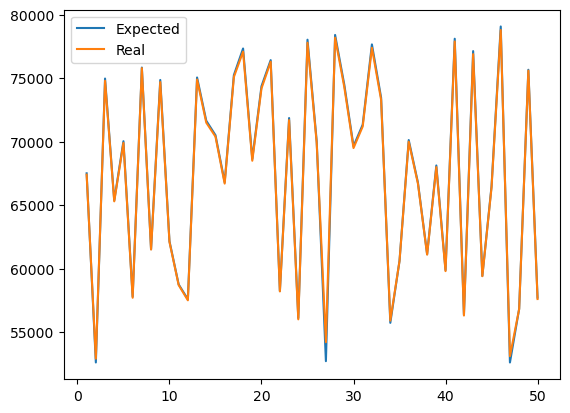

In [246]:
#결과 시각화 하기

real_prices_n = []
pred_prices_n = []
X_num = []
y_test_set = y_test.to_numpy() #인덱스가 뒤죽박죽이어서 인덱스도 바꾸고 데이타 타입도 바꿔줄 겸 쫙~~

n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(len(X_test)):
  real = y_test_set[i]
  prediction = Y_prediction[i]
  print('Real price: {}, Expected price: {}'.format(real, prediction))
  real_prices_n.append(real)
  pred_prices_n.append(prediction)
  n_iter = n_iter + 1
  X_num.append(n_iter)

real_prices = scaler.inverse_transform(pd.DataFrame(real_prices_n)) #노멀라이징 된 예측값을 원래 주가로 돌려주기 위함이다.
pred_prices = scaler.inverse_transform(pd.DataFrame(pred_prices_n))


plt.plot(X_num, pred_prices, label = 'Expected')
plt.plot(X_num, real_prices, label = 'Real')
plt.legend()
plt.show() #테스트한 값이 실제 값과 아주 꼭 맞는다.

### 5. 다른 데이터로 검증
삼성전자 주가 20년1월2일 ~ 20년 12월 30일 까지 데이터로 검증해보기  
sk 하이닉스 주가 22년 11월 27일 까지 1년간 데이터로 테스트  
농심 주가 22년 11월 27일 까지 1년간 데이터로 테스트

In [235]:
#한국 거래소 '정보데이터 시스템'에서 20년도 주가 정보를 받아왔다.

df_r_test = pd.read_csv('./data/samsung_2020.csv')
df_r_test.head()

#데이터 정규화
scaler_ = MinMaxScaler()
scaler_.fit(df_r_test)
scaled_ = scaler_.transform(df_r_test)

df = pd.DataFrame(scaled_)

#inverse_minmaxscaler를 위함
scaler = MinMaxScaler()
scaler.fit(df_r_test['close'].values.reshape(-1,1))

MinMaxScaler()

8/8 [==============================] - 0s 1ms/step
Real price: 0.32987012987012987, Expected price: 0.3318816125392914
Real price: 0.3376623376623378, Expected price: 0.33577191829681396
Real price: 0.3376623376623378, Expected price: 0.3363374173641205
Real price: 0.34545454545454546, Expected price: 0.345831036567688
Real price: 0.37142857142857144, Expected price: 0.3711671829223633
Real price: 0.4181818181818182, Expected price: 0.41769254207611084
Real price: 0.4415584415584417, Expected price: 0.44054704904556274
Real price: 0.4545454545454546, Expected price: 0.4542425572872162
Real price: 0.4545454545454546, Expected price: 0.45388731360435486
Real price: 0.4285714285714286, Expected price: 0.42785537242889404
Real price: 0.47272727272727266, Expected price: 0.4714271128177643
Real price: 0.48831168831168825, Expected price: 0.48938459157943726
Real price: 0.5168831168831169, Expected price: 0.5210511088371277
Real price: 0.49090909090909096, Expected price: 0.49454763531684875

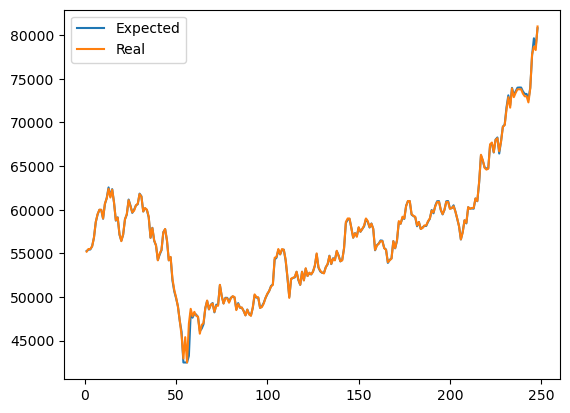

In [242]:
real_prices_n = []
pred_prices_n = []
X_num = []
X = df.iloc[::-1, 1:7]
y = df.iloc[::-1, 0].to_numpy()

n_iter = 0
Y_prediction = model.predict(X).flatten()
for i in range(len(X)):
  real = y[i]
  prediction = Y_prediction[i]
  print('Real price: {}, Expected price: {}'.format(real, prediction))
  real_prices_n.append(real)
  pred_prices_n.append(prediction)
  n_iter = n_iter + 1
  X_num.append(n_iter)

real_prices = scaler.inverse_transform(pd.DataFrame(real_prices_n))
pred_prices = scaler.inverse_transform(pd.DataFrame(pred_prices_n))


plt.plot(X_num, pred_prices, label = 'Expected')
plt.plot(X_num, real_prices, label = 'Real')
plt.legend()
plt.show()

삼성전자와 비슷한 주가 그리고 성격을 띄는 sk 하이닉스 주가로 테스트

8/8 [==============================] - 0s 3ms/step
Real price: 0.703065134099617, Expected price: 0.7087425589561462
Real price: 0.664750957854406, Expected price: 0.6688462495803833
Real price: 0.674329501915709, Expected price: 0.6792846918106079
Real price: 0.6360153256704979, Expected price: 0.639071524143219
Real price: 0.6839080459770115, Expected price: 0.688830554485321
Real price: 0.7509578544061302, Expected price: 0.760537326335907
Real price: 0.7126436781609196, Expected price: 0.7173438668251038
Real price: 0.7222222222222221, Expected price: 0.7275897860527039
Real price: 0.7796934865900382, Expected price: 0.7883522510528564
Real price: 0.7509578544061302, Expected price: 0.7612648010253906
Real price: 0.8180076628352488, Expected price: 0.8228423595428467
Real price: 0.7605363984674327, Expected price: 0.7686355113983154
Real price: 0.7796934865900382, Expected price: 0.78761225938797
Real price: 0.7701149425287357, Expected price: 0.7769978642463684
Real price: 0.81800

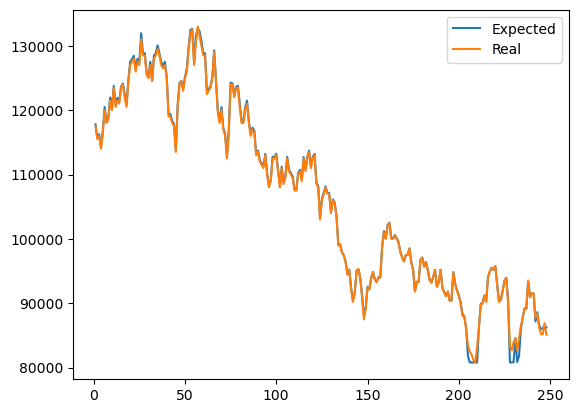

In [248]:
#한국 거래소 '정보데이터 시스템'에서 22년 11월 27일까지 sk 하이닉스 1년간 주가 정보를 받아왔다.

df_r_test = pd.read_csv('./data/skhynix.csv')
df_r_test.head()

#데이터 정규화
scaler_ = MinMaxScaler()
scaler_.fit(df_r_test)
scaled_ = scaler_.transform(df_r_test)

df = pd.DataFrame(scaled_)

#inverse_minmaxscaler를 위함
scaler = MinMaxScaler()
scaler.fit(df_r_test['close'].values.reshape(-1,1))

real_prices_n = []
pred_prices_n = []
X_num = []
X = df.iloc[::-1, 1:7]
y = df.iloc[::-1, 0].to_numpy()

n_iter = 0
Y_prediction = model.predict(X).flatten()
for i in range(len(X)):
  real = y[i]
  prediction = Y_prediction[i]
  print('Real price: {}, Expected price: {}'.format(real, prediction))
  real_prices_n.append(real)
  pred_prices_n.append(prediction)
  n_iter = n_iter + 1
  X_num.append(n_iter)

real_prices = scaler.inverse_transform(pd.DataFrame(real_prices_n))
pred_prices = scaler.inverse_transform(pd.DataFrame(pred_prices_n))


plt.plot(X_num, pred_prices, label = 'Expected')
plt.plot(X_num, real_prices, label = 'Real')
plt.legend()
plt.show() #아주 잘 맞추는 것 같다.

성격이 전혀 다른 농심으로 테스트

8/8 [==============================] - 0s 2ms/step
Real price: 0.3571428571428572, Expected price: 0.3585659861564636
Real price: 0.2857142857142856, Expected price: 0.28510189056396484
Real price: 0.2597402597402598, Expected price: 0.2593681216239929
Real price: 0.11688311688311659, Expected price: 0.15125754475593567
Real price: 0.19480519480519476, Expected price: 0.19375859200954437
Real price: 0.27922077922077904, Expected price: 0.2786216735839844
Real price: 0.27922077922077904, Expected price: 0.27886155247688293
Real price: 0.31168831168831135, Expected price: 0.3109234571456909
Real price: 0.3896103896103895, Expected price: 0.38989201188087463
Real price: 0.3441558441558441, Expected price: 0.3455497920513153
Real price: 0.35064935064935066, Expected price: 0.35092705488204956
Real price: 0.3441558441558441, Expected price: 0.34486132860183716
Real price: 0.5064935064935066, Expected price: 0.5065520405769348
Real price: 0.6298701298701301, Expected price: 0.630619525909423

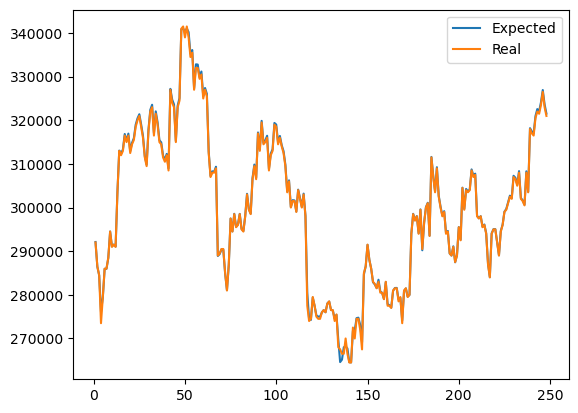

In [249]:
#한국 거래소 '정보데이터 시스템'에서 22년 11월 27일까지 농심 1년간 주가 정보를 받아왔다.

df_r_test = pd.read_csv('./data/nongsim.csv')
df_r_test.head()

#데이터 정규화
scaler_ = MinMaxScaler()
scaler_.fit(df_r_test)
scaled_ = scaler_.transform(df_r_test)

df = pd.DataFrame(scaled_)

#inverse_minmaxscaler를 위함
scaler = MinMaxScaler()
scaler.fit(df_r_test['close'].values.reshape(-1,1))

real_prices_n = []
pred_prices_n = []
X_num = []
X = df.iloc[::-1, 1:7]
y = df.iloc[::-1, 0].to_numpy()

n_iter = 0
Y_prediction = model.predict(X).flatten()
for i in range(len(X)):
  real = y[i]
  prediction = Y_prediction[i]
  print('Real price: {}, Expected price: {}'.format(real, prediction))
  real_prices_n.append(real)
  pred_prices_n.append(prediction)
  n_iter = n_iter + 1
  X_num.append(n_iter)

real_prices = scaler.inverse_transform(pd.DataFrame(real_prices_n))
pred_prices = scaler.inverse_transform(pd.DataFrame(pred_prices_n))


plt.plot(X_num, pred_prices, label = 'Expected')
plt.plot(X_num, real_prices, label = 'Real')
plt.legend()
plt.show() # 아주 잘 맞추더라.

데이터셋이 레이블과 관련이 아주 높기때문에 학습은 참 잘된다.  
지금까지 배운것들을 복습하기에는 좋으나 크게 의미가 있는 모델인가 싶어 아쉬움이 남는다.